<a href="https://colab.research.google.com/github/BotenAqua/MetodyNumeryczne/blob/master/Lista_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import scipy.integrate as sint

In [0]:
# TASKS (9p)
#1 Looking at the Euler method above create your own function which takes:
# a (from x' = ax)
# h - step
# T time range
# as an input and plots the solution of a differential equation x' = ax (1p)

def euler(a, h, T):
  
  x = np.arange(0,T,h)
  y = [1]
  
  for i in range(len(x)-1):
    y.append(y[-1] + h * y[-1])
  plt.plot(x,y)
  plt.show()
  
  return

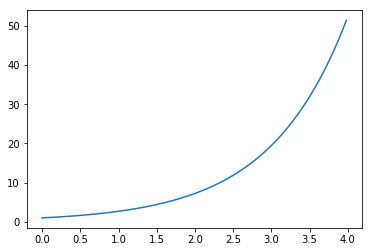

In [0]:
euler(3,0.02,4)

In [0]:
#2 Beside the solution print the 'ideal' approximation on your chart using for example green color as a reference. (1p)
#2 Hint: use small step value. Use plt.legend to explain which serie is the 'ideal'

def euler2(a, h, T, h_ideal = 0.000001):
  
  x = np.arange(0,T,h)
  y = [1]
  for i in range(len(x)-1):
    y.append(y[-1] + h * y[-1])
  
  x_ideal = np.arange(0,T,h_ideal)
  y_ideal = [1]
  for i in range(len(x_ideal)-1):
    y_ideal.append(y_ideal[-1] + h_ideal * y_ideal[-1])
  
  
  plt.plot(x, y, label = "dla h = %f" %(h))
  plt.plot(x_ideal, y_ideal, color = "green", label = "dla h = %f" %(h_ideal))
  
  
  plt.legend()
  plt.show()
  
  return

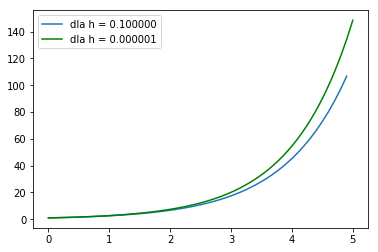

In [0]:
euler2(4,0.1,5)

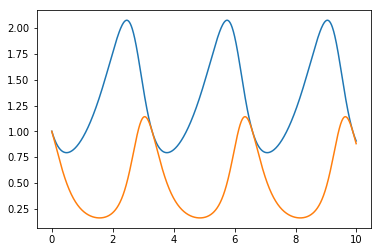

In [0]:
#3 Find a differential equation which represents a process / model (your choice) and implement it using odeint python function (1p)
#Lotka-Volterr

def fun(x, t):
  a = 1
  b = 2
  c = 3
  d = 4
  dx = [0, 0]
  dx[0] = (a - b*x[1]) * x[0]
  dx[1] = (c*x[0] - d) * x[1]
  return dx

h3 = 0.01
czas = np.arange(0,10,h3)
xp = ((1,1))

x_ode = sint.odeint(fun, xp, czas)

plt.plot(czas, x_ode)
plt.show()

Optimization terminated successfully.
         Current function value: -0.999999
         Iterations: 35
         Function evaluations: 67


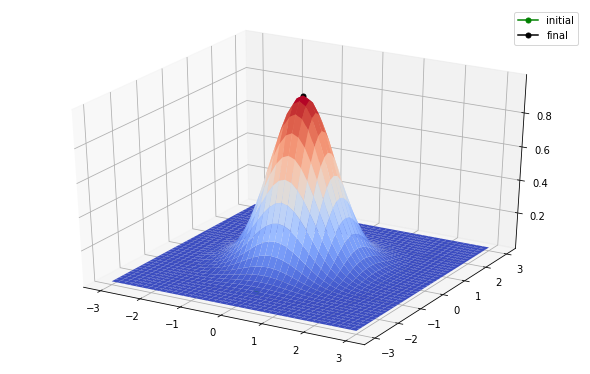

In [0]:
#4 Look at the example of optimization for exponential function.
# Did you encounter any errors? Where in code do we display the optimal point? Do we minimize or maximize and which function?
# Start your search always from the point (0, -2). (1p)

from scipy import linspace , cos , exp, random, meshgrid, zeros
from scipy.optimize import fmin
from matplotlib.pyplot import plot, show, legend, figure, cm, contour, clabel
def f(x):
    return exp(-x[0] ** 2 - x[1] ** 2)


def neg_f(x):
    return -f(x)

#x0 = random.randn(2)
x0 = [0, -2]
x_min = fmin(neg_f, x0)

from mpl_toolkits.mplot3d import Axes3D

delta = 3
x_knots = linspace(x_min[0] - delta, x_min[0] + delta, 41)
y_knots = linspace(x_min[1] - delta, x_min[1] + delta, 41)
X, Y = meshgrid(x_knots, y_knots)
Z = zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = f([X[i, j], Y[i, j]])

ax = Axes3D(figure(figsize=(8, 5)))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0.4)
ax.plot([x0[0]], [x0[1]], [f(x0)], color='g', marker='o', markersize=5, label='initial')
ax.plot([x_min[0]], [x_min[1]], [f(x_min)], color='k', marker='o', markersize=5, label='final')
ax.legend()
show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


Optimization terminated successfully.
         Current function value: -1.947734
         Iterations: 44
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: -1.947734
         Iterations: 55
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -1.947734
         Iterations: 44
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: -1.947734
         Iterations: 51
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: -1.947734
         Iterations: 50
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: -1.947734
         Iterations: 50
         Function evaluations: 94
Optimization terminated successfully.
         Current function value: -1.947734
         Iterations: 52
         Function evaluations: 98
Optimization terminated su

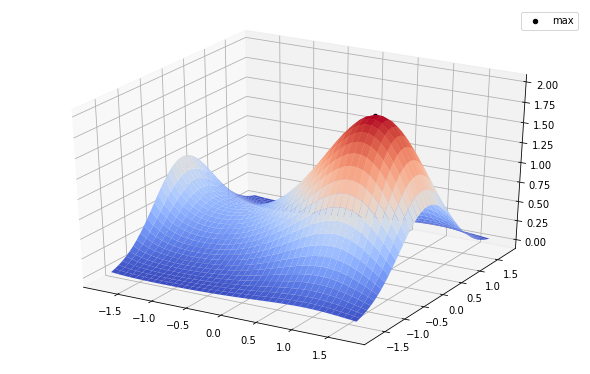

Optimum w  [ 9.99955582e-01 -1.01606440e-05]


In [0]:
#5 Create your own 3d function with multiple local optima.
# Create an algorithm which takes an initial point and looks for the closest local optimum (1p)
# Create an algorithm which aims to find a global optimum, the time of execution is limiter to ~30sec (1p)
# If your solution is heuristic test its quality. Measure the probability of finding the GLOBAL optimum (1p).
# You can, for example, execute your search function multiple times and check if the returned result is what you expected.
# Measure the success / total trials rate (2p).

from scipy import linspace , cos , exp, random, meshgrid, zeros
from scipy.optimize import fmin
from matplotlib.pyplot import plot, show, legend, figure, cm, contour, clabel
from mpl_toolkits.mplot3d import Axes3D


def f(x):
    return exp((-1/3 * x[0] ** 3) + x[0] - (x[1]**2))

def neg_f(x):
    return -f(x)

przedzial = (-1.75,1.75)
iks = np.linspace(przedzial[0], przedzial[1], 21)
igrek = np.linspace(przedzial[0], przedzial[1], 21)
minlok = []

for i in iks:
  for j in igrek:
    minlok.append(fmin(neg_f, [i,j], full_output = 1, disp = 1))
#print(minlok)

minglob = [minlok[0]]
for i in minlok:
  if i[1] > minglob[0][1]: minglob = i

#print(minglob)
wsp_max = minglob[0]
wart_max = minglob[1]

  

x_knots = linspace(przedzial[0], przedzial[1], 41)
y_knots = linspace(przedzial[0], przedzial[1], 41)
X, Y = meshgrid(x_knots, y_knots)
Z = zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = f([X[i, j], Y[i, j]])

ax = Axes3D(figure(figsize=(8, 5)))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0.4)
ax.scatter(wsp_max[0], wsp_max[1], -wart_max, color='k', marker='o', label='max')
ax.legend()
show()
print("Optimum w ", wsp_max)